In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_tufte import *
setup()

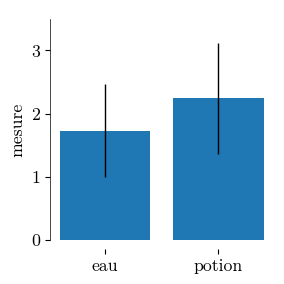

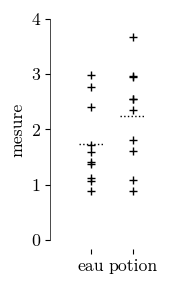

sample averages : [1.7321353905992443, 2.2420055206412672]
sample stdevs : [0.7340673285812879, 0.8828189996812036]
ratio of means : 1.294
mean estimators : ['1.7±0.2', '2.2±0.3']


In [2]:
np.random.seed(22)
m, s = 2, 1
m_, s_ = np.log(m) - 0.5*np.log(s**2/m**2 + 1), np.sqrt(np.log(s**2/m**2 + 1))
N = 10
sample1 = np.random.lognormal(m_, s_, N)
sample2 = np.random.lognormal(m_, s_, N)


means = [np.mean(sample1), np.mean(sample2)]
stds = [np.std(sample1) * np.sqrt(N/(N-1)), np.std(sample2) * np.sqrt(N/(N-1))]  # sample averages
x = [0, 1]

fig, ax = plt.subplots(dpi=100, figsize=(3, 3))
ax.bar(x, means, yerr=stds, color='C1')
# ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_xticks(x)
ax.set_xticklabels(['eau', 'potion'])
ax.set_ylabel('mesure')
ax.set_ylim((0, 3.5))
breathe(ax, 'y')
ax.spines.bottom.set_visible(False)
fig.savefig('lebox.png', dpi=300, facecolor='white')
plt.show()
fig.savefig('fig1.png', transparent=True)
fig.savefig('fig1.svg', transparent=True)

fig, ax = plt.subplots(dpi=100, figsize=(2, 3))
for x_, sample in zip(x, (sample1, sample2)):
	ax.plot([x_]*len(sample), sample, linestyle='', marker='+', color='k')
	ax.hlines(np.mean(sample), x_-0.3, x_+0.3, linestyle='dotted', color='k')
# ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_xticks(x)
ax.set_xticklabels(['eau', 'potion'])
ax.set_xlim((-1, 2))
ax.set_ylim((0, 4))
ax.set_ylabel('mesure')
breathe(ax, 'y')
ax.spines.bottom.set_visible(False)
plt.show()
fig.savefig('fig2.png', transparent=True)
fig.savefig('fig2.svg', transparent=True)

print(f'sample averages : {means}')
print(f'sample stdevs : {stds}')
print(f'ratio of means : {means[1]/means[0]:.3f}')
print(f'mean estimators : {["{:.1f}".format(m) + "±" + "{:.1f}".format(s/np.sqrt(N)) for m, s in zip(means, stds)]}')

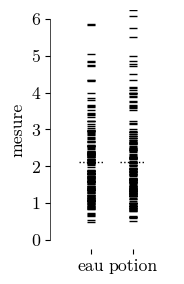

sample averages : [2.1210511316633966, 2.119846830309316]
sample stdevs : [1.1161062711665428, 1.1547565346420252]
ratio of means : 0.999
mean estimators : ['2.121±0.079', '2.120±0.082']


In [3]:
np.random.seed(22)
m, s = 2, 1
m_, s_ = np.log(m) - 0.5*np.log(s**2/m**2 + 1), np.sqrt(np.log(s**2/m**2 + 1))
N = 200
sample1 = np.random.lognormal(m_, s_, N)
sample2 = np.random.lognormal(m_, s_, N)

means = [np.mean(sample1), np.mean(sample2)]
stds = [np.std(sample1) * np.sqrt(N/(N-1)), np.std(sample2) * np.sqrt(N/(N-1))]  # sample stdev
x = [0, 1]

fig, ax = plt.subplots(dpi=100, figsize=(2, 3))
for x_, sample in zip(x, (sample1, sample2)):
	ax.plot([x_]*len(sample), sample, linestyle='', marker='_', color='k')
	ax.hlines(np.mean(sample), x_-0.3, x_+0.3, linestyle='dotted', color='k')
ax.set_xticks(x)
ax.set_xticklabels(['eau', 'potion'])
ax.set_xlim((-1, 2))
ax.set_ylim((0, 6))
ax.set_ylabel('mesure')
breathe(ax, 'y')
ax.spines.bottom.set_visible(False)
plt.show()
fig.savefig('fig3.png', transparent=True)
fig.savefig('fig3.svg', transparent=True)

print(f'sample averages : {means}')
print(f'sample stdevs : {stds}')
print(f'ratio of means : {means[1]/means[0]:.3f}')
print(f'mean estimators : {["{:.3f}".format(m) + "±" + "{:.3f}".format(s/np.sqrt(N)) for m, s in zip(means, stds)]}')

In [4]:
import matplotlib.patches, matplotlib.path

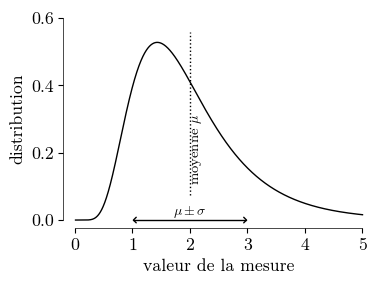

In [5]:
x = np.linspace(0.01, 5, 2000)
# https://en.wikipedia.org/wiki/Log-normal_distribution#Probability_density_function
m, s = 2, 1
m_, s_ = np.log(m) - 0.5*np.log(s**2/m**2 + 1), np.sqrt(np.log(s**2/m**2 + 1))
p_lognormal = 1/(x*s_*np.sqrt(2*np.pi)) * np.exp(-(np.log(x) - m_)**2/(2*s_**2))
p_normal = 1/(s*np.sqrt(2*np.pi)) * np.exp(-(x-m)**2/(2*s**2))

plt.close('all')
fig, ax = plt.subplots(dpi=100, figsize=(4, 3))
ax.set_xlabel('valeur de la mesure')
ax.set_ylabel('distribution')
ax.axvline(m, 0.15, 0.9, linestyle=':', color='C0')
ax.text(m, 0.12, 'moyenne $\mu$', rotation=90, fontsize='small')
ax.add_patch(matplotlib.patches.FancyArrowPatch(
	arrowstyle='<->,head_length=2,head_width=2',
	path=matplotlib.path.Path([(m-s, 0), (m+s, 0)]))
)
ax.text(m, 0, '$\mu \pm \sigma$', fontsize='small', va='bottom', ha='center')
# ax.plot(x, p_normal, label='dist. normale')
ax.plot(x, p_lognormal)  #, label='dist. lognormale')
ax.set_xlim((0, 5))
ax.set_ylim((0, 0.6))
# ax.legend()
breathe(ax)
plt.show()
fig.savefig('fig4.png', transparent=True)
fig.savefig('fig4.svg', transparent=True)

# both have the same mean and stdev

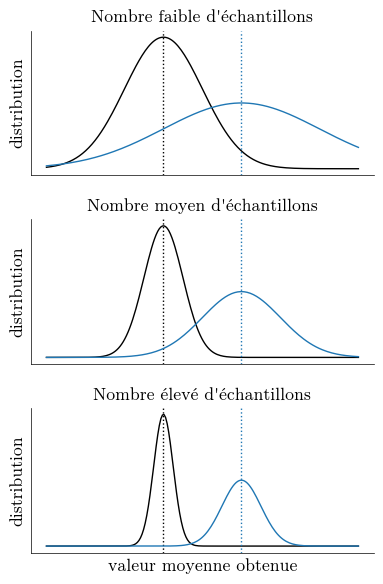

In [6]:
plt.close('all')
x = np.linspace(-3, 13, 200)
fig, axs = plt.subplots(dpi=100, nrows=3, facecolor='white', figsize=(4, 6), sharex=True)
for idx, (ax, (s1, s2), (m1, m2)) in enumerate(zip(axs, [(2, 4), (1, 2), (1/2, 1)], [(3, 7), (3, 7), (3, 7)])):
	p1 = 1/(s1*np.sqrt(2*np.pi))*np.exp(-(x-m1)**2/(2*s1**2))
	p2 = 1/(s2*np.sqrt(2*np.pi))*np.exp(-(x-m2)**2/(2*s2**2))
	ax.xaxis.set_minor_locator(plt.NullLocator())
	ax.xaxis.set_major_locator(plt.NullLocator())
	ax.yaxis.set_minor_locator(plt.NullLocator())
	ax.yaxis.set_major_locator(plt.NullLocator())
	if idx == 2:
		ax.set_xlabel('valeur moyenne obtenue')
	ax.set_title(['Nombre faible d\'échantillons', 'Nombre moyen d\'échantillons', 'Nombre élevé d\'échantillons'][idx], fontsize='medium')
	ax.set_ylabel('distribution')
	ax.plot(x, p1, color='C0')
	ax.axvline(m1, color='C0', linestyle=':')
	ax.plot(x, p2, color='C1')
	ax.axvline(m2, color='C1', linestyle=':')
	# ax.fill_between(x, 0, np.min([p1, p2], axis=0), color='tab:red', alpha=0.5)
plt.show()
fig.savefig('fig5.png', transparent=True)
fig.savefig('fig5.svg', transparent=True)